In [2]:
from utils import Dataloader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = 'data'
movies_df = Dataloader.load_movies(path)
ratings_df = Dataloader.load_ratings(path)
users_df = Dataloader.load_users(path)
tags_df = Dataloader.load_tags(path)

In [16]:
users_df

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [15]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [14]:
movies_df[movies_df['movieId']==2787]

,movieId,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2718,2787,Cat's Eye (1985),Horror,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
tags_df['userId'].value_counts()

userId
10555    6012
23388    5811
23172    4034
33384    3632
52723    1747
         ... 
35568       1
35553       1
35543       1
35462       1
35438       1
Name: count, Length: 4009, dtype: int64

In [4]:
ratings_df.loc[ratings_df['movieId']==1205]

,userId,movieId,rating,timestamp
2763,22,1205,4,978136836
3348,25,1205,5,978132441
7037,48,1205,3,978032270
7959,53,1205,4,977950419
8618,58,1205,4,977936364
...,...,...,...,...
957100,5776,1205,4,958169348
961449,5795,1205,1,958145035
962158,5797,1205,1,958059106
965536,5824,1205,3,957898304


In [5]:
movies_df.loc[movies_df['movieId']==1205]

,movieId,title,genres
1187,1205,"Transformers: The Movie, The (1986)",Action|Animation|Children's|Sci-Fi|Thriller|War


In [6]:
display(ratings_df.info())
display(users_df.info())
display(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


None

In [7]:
display(movies_df.duplicated().sum())
display(ratings_df.duplicated().sum())
display(users_df.duplicated().sum())

0

0

0

### 08/10 목요일 시각화 할것
- 가장 평점이 높은 영화 top5
- 가장 평점이 높은 장르 top5

In [8]:
rating_top = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count'])

# 평점 1개에 5점짜리 영화가 많아서 평점개수의 중앙값을 찾은 뒤 그 이상의 데이터들만 가지고 가장 평점이 높은 영화 top5선정
rating_top['count'].median()

123.5

In [9]:
rating_top5 = rating_top.loc[rating_top['count']>123.5]
rating_top5 = rating_top5['mean'].sort_values(ascending=False)

In [10]:
# rating_top5 시리즈를 데이터프레임으로 변환
rating_top5_df = rating_top5.to_frame(name='rating')
rating_top5_df

,rating
movieId,
2019,4.560510
318,4.554558
858,4.524966
745,4.520548
50,4.517106
...,...
2382,1.766667
2555,1.701220
2383,1.657718


In [11]:
# movies_df의 인덱스를 'movieId'로 설정
movies_df_sample = movies_df.set_index('movieId')

rating_top5_df['title'] = movies_df_sample['title']

rating_top5_df['genres'] = movies_df_sample['genres']

In [12]:
rating_top5_df = rating_top5_df.head(5)

In [13]:
# 위의 데이터프레임이 제대로 되었나 확인용
movies_df.loc[movies_df['movieId']==2019]

,movieId,title,genres
1950,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama


In [14]:
rating_top5_df

,rating,title,genres
movieId,,,
2019,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama
318,4.554558,"Shawshank Redemption, The (1994)",Drama
858,4.524966,"Godfather, The (1972)",Action|Crime|Drama
745,4.520548,"Close Shave, A (1995)",Animation|Comedy|Thriller
50,4.517106,"Usual Suspects, The (1995)",Crime|Thriller


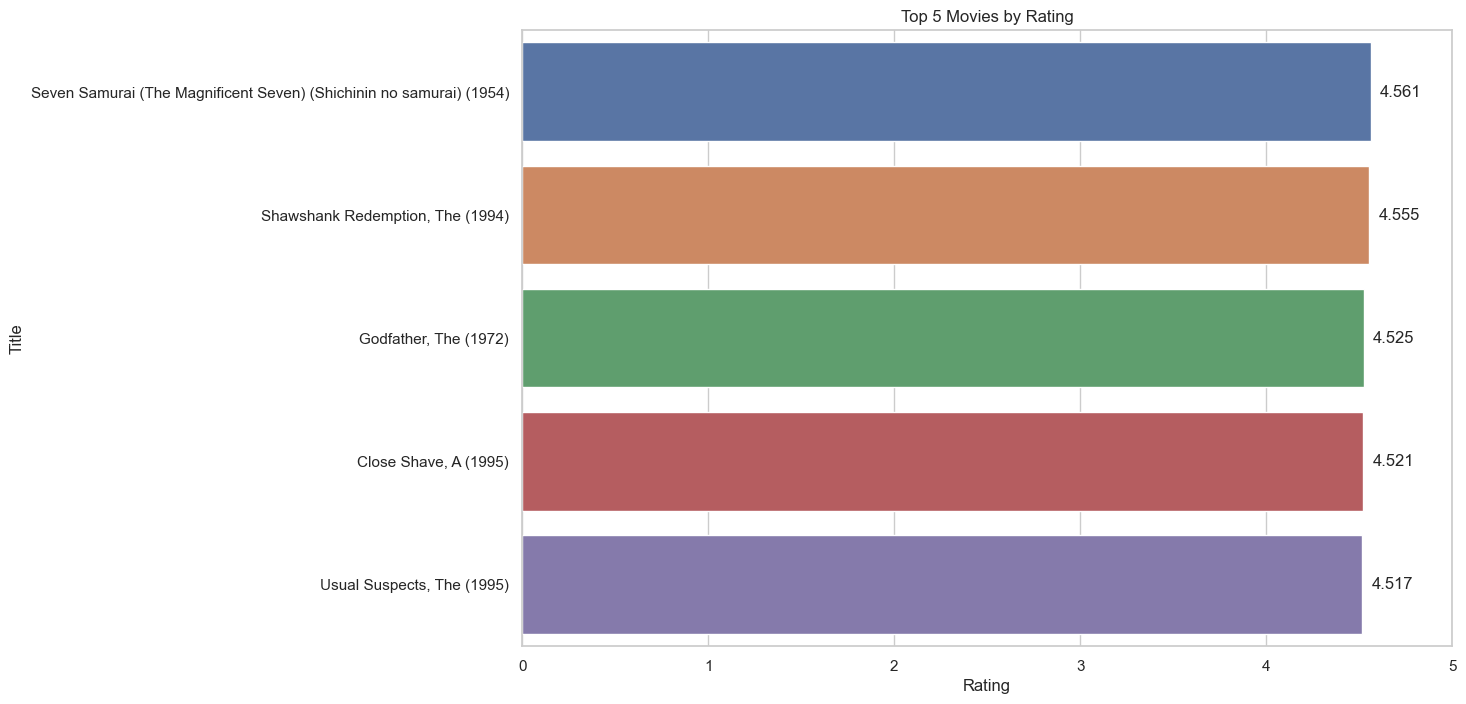

In [15]:
# 가장 평점이 높은 영화 top5

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='rating', y='title', data=rating_top5_df)
plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Top 5 Movies by Rating')
# x축 범위 설정
plt.xlim(0, 5)

# 각 막대의 중간에 레이팅 값 표시
for p in ax.patches:
    rating_value = p.get_width()  # 막대의 너비(레이팅 값)
    title = p.get_y() + p.get_height() / 2  # 막대의 중간 y 좌표
    ax.text(rating_value + 0.05, title, f'{rating_value:.3f}', va='center')  # 숫자 표시

plt.show()

In [16]:
movies_df_top = movies_df.copy()

movies_df_top['genres'] = movies_df['genres'].str.split('|')

movies_df_top

,movieId,title,genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy]
3879,3949,Requiem for a Dream (2000),[Drama]
3880,3950,Tigerland (2000),[Drama]
3881,3951,Two Family House (2000),[Drama]


In [17]:
movies_expanded = movies_df_top.explode('genres')
movies_expanded

,movieId,title,genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama


In [18]:
# 장르별 레이팅 평균 계산
genre_rating_mean = ratings_df.merge(movies_expanded, on='movieId').groupby('genres')['rating'].mean()

In [19]:
genre_top_5 = genre_rating_mean.sort_values(ascending=False).head(5)

In [20]:
genre_rating_df = pd.DataFrame(list(genre_top_5.items()), columns=['genres', 'rating'])

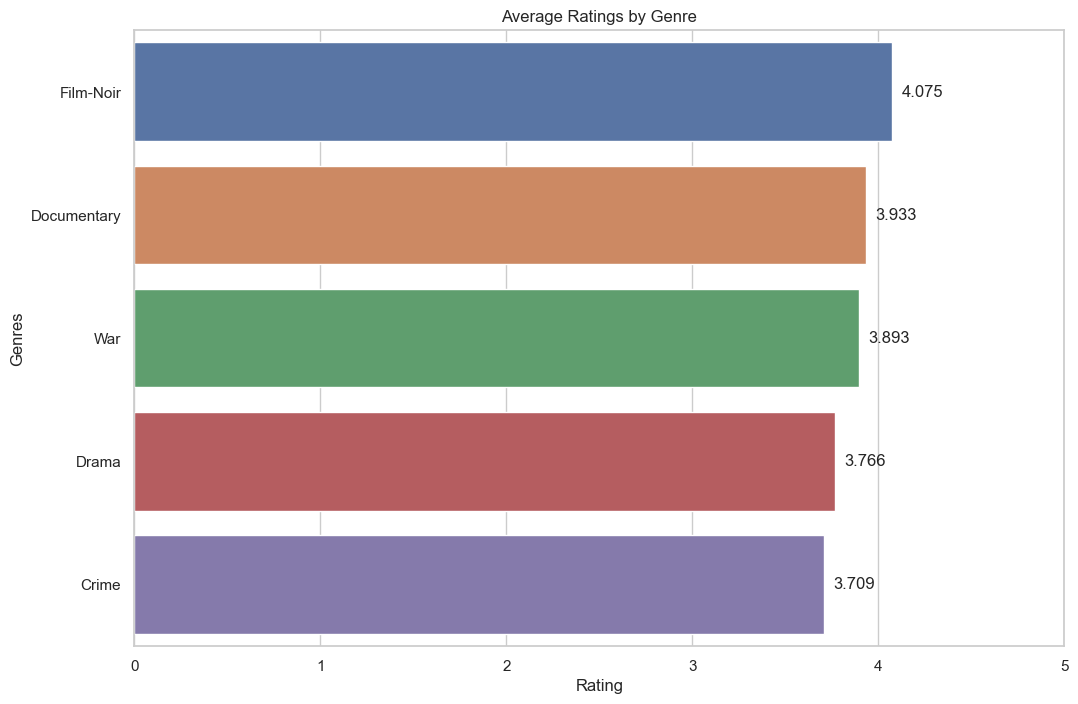

In [21]:
# 가장 평점이 높은 장르 top5

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='rating', y='genres', data=genre_rating_df)
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.title('Average Ratings by Genre')
plt.xlim(0, 5)

# 각 막대의 중간에 레이팅 값 표시
for p in ax.patches:
    rating_value = p.get_width()  # 막대의 너비(레이팅 값)
    title = p.get_y() + p.get_height() / 2  # 막대의 중간 y 좌표
    ax.text(rating_value + 0.05, title, f'{rating_value:.3f}', va='center')  # 숫자 표시

plt.show()

In [22]:
users_df['Occupation'].value_counts()

Occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: count, dtype: int64

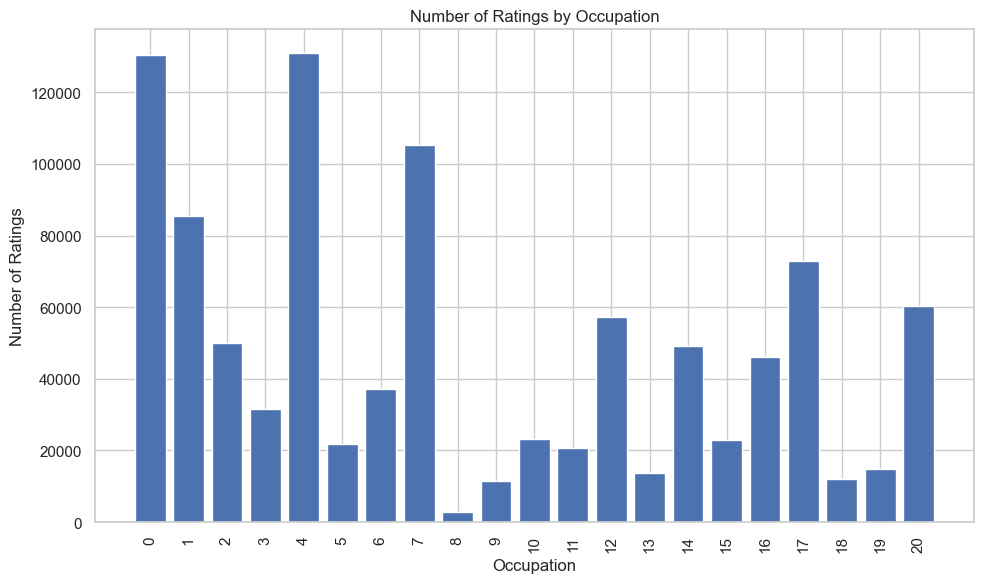

In [23]:
# 사용자의 직업과 평가 데이터를 병합
merged_data = ratings_df.merge(users_df, on='userId', how='inner')

# 직업별 평가 데이터 그룹화
occupation_ratings = merged_data.groupby('Occupation')['rating'].count().reset_index()
occupation_ratings = occupation_ratings.sort_values(by='Occupation', ascending=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(occupation_ratings['Occupation'], occupation_ratings['rating'])
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Occupation')
plt.xticks(np.arange(len(occupation_ratings)), rotation=90)
plt.tight_layout()
plt.show()

#### Cosine 유사도 기반(컨텐츠 기반)

$$cosine(X_r, X_s) = \frac{X_r \cdot X_s}{\parallel X_r \parallel \parallel X_s \parallel} = \frac{\sum_{i=1}^n X_{ri}X_{si}}{\sqrt{\sum_{i=1}^n X_{ri}^2}\sqrt{\sum_{i=1}^n X_{si}^2}}$$

In [24]:
import numpy as np

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

print(cosine_similarity([3, 10, 7, 2], [2, 15, 10, 12]))

0.9031334566143822


In [25]:
# 영화 전체 movieID
array1 = movies_df['movieId'].unique()

In [26]:
# 평점 매긴 전체 movieID
array2 = ratings_df['movieId'].unique()

In [27]:
# 영화ID는 있지만 평점매긴영화ID에는 없는 원소 찾기
missing_elements = [element for element in array1 if element not in array2]
print("Missing elements in array2:", missing_elements)

Missing elements in array2: [51, 109, 115, 143, 284, 285, 395, 399, 400, 403, 604, 620, 625, 629, 636, 654, 675, 676, 683, 693, 699, 713, 721, 723, 727, 738, 739, 752, 768, 770, 772, 773, 777, 794, 795, 797, 812, 816, 819, 822, 825, 845, 855, 856, 857, 871, 873, 890, 894, 979, 983, 1001, 1045, 1052, 1065, 1075, 1106, 1108, 1109, 1110, 1122, 1137, 1140, 1141, 1143, 1146, 1155, 1156, 1157, 1158, 1159, 1166, 1308, 1309, 1314, 1318, 1319, 1368, 1400, 1424, 1443, 1448, 1462, 1467, 1524, 1557, 1559, 1568, 1577, 1578, 1628, 1697, 1698, 1705, 1706, 1708, 1710, 1716, 1723, 1738, 1740, 1742, 1757, 1765, 1768, 1774, 1776, 1781, 1789, 1819, 1847, 2030, 2199, 2216, 2220, 2222, 2224, 2225, 2228, 2229, 2230, 2270, 2274, 2319, 2489, 2508, 2547, 2564, 2588, 2595, 2601, 2603, 2604, 2680, 2684, 2698, 2832, 2838, 2910, 2954, 2957, 2958, 2980, 3009, 3023, 3059, 3080, 3170, 3191, 3193, 3195, 3226, 3227, 3231, 3234, 3278, 3279, 3332, 3348, 3356, 3369, 3383, 3411, 3455, 3541, 3558, 3560, 3561, 3582, 3583, 358

In [28]:
len(missing_elements)

177

In [29]:
# 전체영화개수에서 밑에 영화-사용자평점행렬 생성한 개수 빼보기
3883 - 3706 # 위와 동일
# 177개의 영화에 대해서는 평점이 매겨지지 않음.

177

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# 영화-사용자 평점 행렬 생성
user_movie_ratings = ratings_df.pivot(index='userId', columns='movieId', values='rating')

# 사용자 간 유사도 계산
user_similarity = cosine_similarity(user_movie_ratings.fillna(0))

# 추천 함수 수정
def recommend_movie(user_id, user_similarity, user_movie_ratings, num_recommendations=5):
    
    global similar_users, new_recommendations, user_rated_movies

    similar_users = user_similarity[user_id].argsort()[::-1][1:]  # 유사도가 높은 순서로 정렬 (자기 자신 제외)
    user_rated_movies = user_movie_ratings.loc[user_id].dropna().index  # 사용자가 평가한 영화
    recommendations = []
    
    for user in similar_users:
        similar_user_rated_movies = user_movie_ratings.loc[user].dropna().index
        new_recommendations = similar_user_rated_movies.difference(user_rated_movies)
        recommendations.extend(new_recommendations)
        if len(recommendations) >= num_recommendations:
            break
            
    return recommendations[:num_recommendations]

# 예시 사용자에게 영화 추천
user_id = 1  # 원하는 사용자 ID 입력
recommended_movies = recommend_movie(user_id, user_similarity, user_movie_ratings)
print("Recommended movies for user", user_id)
recommended_movie_titles = movies_df[movies_df['movieId'].isin(recommended_movies)]['title']
for title in recommended_movie_titles:
    print("Movie:", title)

Recommended movies for user 1
Movie: American President, The (1995)
Movie: Ace Ventura: When Nature Calls (1995)
Movie: Babe (1995)
Movie: Birdcage, The (1996)
Movie: Basketball Diaries, The (1995)


In [31]:
movies_df[movies_df['movieId'].isin(recommended_movies)]

,movieId,title,genres
10,11,"American President, The (1995)",Comedy|Drama|Romance
18,19,Ace Ventura: When Nature Calls (1995),Comedy
33,34,Babe (1995),Children's|Comedy|Drama
139,141,"Birdcage, The (1996)",Comedy
145,147,"Basketball Diaries, The (1995)",Drama


In [32]:
ratings_df.loc[ratings_df['userId']==1]['movieId']

0     1193
1      661
2      914
3     3408
4     2355
5     1197
6     1287
7     2804
8      594
9      919
10     595
11     938
12    2398
13    2918
14    1035
15    2791
16    2687
17    2018
18    3105
19    2797
20    2321
21     720
22    1270
23     527
24    2340
25      48
26    1097
27    1721
28    1545
29     745
30    2294
31    3186
32    1566
33     588
34    1907
35     783
36    1836
37    1022
38    2762
39     150
40       1
41    1961
42    1962
43    2692
44     260
45    1028
46    1029
47    1207
48    2028
49     531
50    3114
51     608
52    1246
Name: movieId, dtype: int64

### Surprise 설치가 안되는중... ㅜㅜ

In [33]:
# from surprise.model_selection import train_test_split
# from surprise import SVD, accuracy

# trainset, testset = train_test_split(ratings_df, test_size=0.2)

# # SVD 모델 생성
# model = SVD(n_factors=100, n_epochs=20, verbose=True)

# # 모델 학습
# model.fit(trainset)

# # 테스트 및 성능 평가
# predictions = model.test(testset)
# rmse = accuracy.rmse(predictions)
# mae = accuracy.mae(predictions)

# print("RMSE:", rmse)
# print("MAE:", mae)

# # 특정 사용자에게 영화 추천
# user_id = 1
# user_items = set(map(lambda x: x[1], filter(lambda x: x[0] == user_id, testset)))
# recommendations = model.get_top_n(testset, n=10)

# print("\nRecommended movies for user", user_id)
# for movie_id, _ in recommendations[user_id]:
#     if movie_id not in user_items:
#         print("Movie:", movie_id)

### 기초적인 인기도 기반 추천시스템?

In [34]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [35]:
# movies_df의 인덱스를 'movieId'로 설정
movies_df_sample = movies_df.set_index('movieId')

movie_ratings = ratings_df.groupby('movieId') \
                            .agg({'rating' : ['count', 'mean']})
movie_ratings['title'] = movies_df_sample['title']

movie_ratings

rating                                         title
         count      mean                                    
movieId                                                     
1         2077  4.146846                    Toy Story (1995)
2          701  3.201141                      Jumanji (1995)
3          478  3.016736             Grumpier Old Men (1995)
4          170  2.729412            Waiting to Exhale (1995)
5          296  3.006757  Father of the Bride Part II (1995)
...        ...       ...                                 ...
3948       862  3.635731             Meet the Parents (2000)
3949       304  4.115132          Requiem for a Dream (2000)
3950        54  3.666667                    Tigerland (2000)
3951        40  3.900000             Two Family House (2000)
3952       388  3.780928               Contender, The (2000)

[3706 rows x 3 columns]

In [36]:
# 'rating' 컬럼의 'count' 값을 추출하여 시리즈로 변환
count_series = movie_ratings[('rating', 'count')]

# 80% 분위수 계산
quantile_80 = count_series.quantile(0.8)

print(quantile_80)

429.0


In [37]:
movie_ratings[movie_ratings[("rating", "count")] >= 429] \
             .sort_values([("rating", "mean"), ("rating", "count")], ascending=[False, False]) \
             .head(10)

rating                                                        title
         count      mean                                                   
movieId                                                                    
2019       628  4.560510  Seven Samurai (The Magnificent Seven) (Shichin...
318       2227  4.554558                   Shawshank Redemption, The (1994)
858       2223  4.524966                              Godfather, The (1972)
745        657  4.520548                              Close Shave, A (1995)
50        1783  4.517106                         Usual Suspects, The (1995)
527       2304  4.510417                            Schindler's List (1993)
1148       882  4.507937                         Wrong Trousers, The (1993)
922        470  4.491489      Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1198      2514  4.477725                     Raiders of the Lost Ark (1981)
904       1050  4.476190                                 Rear Window (1954)

### TF-IDF 코사인유사도 기법?

- 피어슨 유사도
- 각 벡터의 표본평균으로 normalization을 하고, 코사인 유사도를 구하면 그게 곧 피어슨 유사도 식
$$r_{rs} = \frac{\sum_{i=1}^n (X_{ri} - \overline{X_r}) (X_{si} - \overline{X_s})}{\sqrt{\sum_{i=1}^n (X_{ri} - \overline{X_r})^2}\sqrt{\sum_{i=1}^n (X_{si} - \overline{X_s})^2}}$$

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['genres'])

# 코사인 유사도 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 영화 제목과 인덱스 매핑
title_to_index = pd.Series(movies_df.index, index=movies_df['title'])

# 추천 함수 정의
def recommend_movie(title, cosine_sim=cosine_sim):
    idx = title_to_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # 자기 자신은 제외하고 상위 10개 선택
    movie_indices = [score[0] for score in sim_scores]
    return movies_df['title'].iloc[movie_indices]

# 영화 추천
recommended_movies = recommend_movie('Toy Story (1995)')
print(recommended_movies)

1050            Aladdin and the King of Thieves (1996)
2072                          American Tail, An (1986)
2073        American Tail: Fievel Goes West, An (1991)
2285                         Rugrats Movie, The (1998)
2286                              Bug's Life, A (1998)
3045                                Toy Story 2 (1999)
3542                             Saludos Amigos (1943)
3682                                Chicken Run (2000)
3685    Adventures of Rocky and Bullwinkle, The (2000)
12                                        Balto (1995)
Name: title, dtype: object


### Kmeans 클러스터링 이용한건데 이상해서 보류

In [39]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.metrics.pairwise import cosine_similarity

# # TF-IDF 벡터화
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['genres'])

# # K-Means 군집화
# num_clusters = 5
# kmeans = KMeans(n_clusters=num_clusters, random_state=0)
# kmeans.fit(tfidf_matrix)
# movies_df['cluster'] = kmeans.labels_

# def recommend_movies_for_user(user_id, num_recommendations=5):
#     # 해당 사용자가 시청한 영화들의 클러스터를 가져옴
#     user_movie_ratings = ratings_df[ratings_df['userId'] == user_id]
#     user_rated_movie_titles = movies_df[movies_df['movieId'].isin(user_movie_ratings['movieId'])]['title']
#     user_clusters = movies_df[movies_df['title'].isin(user_rated_movie_titles)]['cluster'].values

#     # 클러스터 내의 다른 영화들을 추천
#     recommended_movies = []
#     for cluster in user_clusters:
#         cluster_movies = movies_df[movies_df['cluster'] == cluster]['title']
#         cluster_movies = cluster_movies[~cluster_movies.isin(user_rated_movie_titles)]
#         recommended_movies.extend(cluster_movies)
    
#     return recommended_movies[:num_recommendations]

# # 예시 사용자에게 영화 추천
# user_id = 1  # 원하는 사용자 ID 입력
# recommended_movies = recommend_movies_for_user(user_id)
# print(f"Recommended movies for user {user_id}:")
# for title in recommended_movies:
#     print(title)

### 실험

In [40]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['genres'])

# 코사인 유사도 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 영화 추천 함수
def get_movie_recommendations(movie_title, cosine_sim=cosine_sim, num_recommendations=5):
    idx = movies_df[movies_df['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(num_recommendations + 1)]  # 상위 n개 유사한 영화 선택
    movie_indices = [score[0] for score in sim_scores]
    return movies_df['title'].iloc[movie_indices]

# 사용자 아이디를 입력받아 해당 사용자가 평가한 영화를 찾고, 그 영화들을 기반으로 추천
user_id = int(input("Enter your user ID: "))
user_rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId']
recommended_movies = []

for movie_id in user_rated_movies:
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
    recommended_movies.extend(get_movie_recommendations(movie_title, num_recommendations=5))

recommended_movies = list(set(recommended_movies))  # 중복 제거
print(f"Recommended movies for user {user_id}:")
for i, movie_title in enumerate(recommended_movies):
    print(movie_title)
    if i >= 4:  # 0부터 시작하므로 4까지 루프를 돌면 5개 출력됩니다.
        break

Recommended movies for user 1:
Aladdin (1992)
Fargo (1996)
Steamboat Willie (1940)
Last Summer in the Hamptons (1995)
Karate Kid, Part II, The (1986)


In [41]:
movies_df.loc[movies_df['title']=="Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)"]

,movieId,title,genres
62,63,Don't Be a Menace to South Central While Drink...,Comedy


In [42]:
ratings_df.loc[ratings_df['userId']==1].merge(movies_df, on='movieId').head()

,userId,movieId,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


### 기존 베이스코드 확인용

In [43]:
import spacy
import re
from gensim.models import Word2Vec

nlp = spacy.load('en_core_web_sm')
wv = Word2Vec.load("./models/word2vec.model").wv

def tokenizer(sentence):
    doc = nlp(sentence)
    word_list = [token.lemma_ for token in doc[:-3]]
    
    return word_list

def vectorizer(token_list):
    vector=0
    for token in token_list:
        vector += wv[token]
    return vector / len(token_list)

In [44]:
tokens = movies_df['title'].apply(tokenizer)
tokens

0                             [Toy, Story]
1                                [Jumanji]
2                     [Grumpier, Old, Men]
3                       [wait, to, Exhale]
4       [Father, of, the, Bride, Part, II]
                       ...                
3878                  [meet, the, Parents]
3879              [requiem, for, a, Dream]
3880                           [Tigerland]
3881                  [two, Family, House]
3882                   [Contender, ,, the]
Name: title, Length: 3883, dtype: object

In [45]:
w2v = Word2Vec(sentences=tokens, vector_size = 100, window = 2, min_count = 1, workers = 4, sg= 0)

wv = w2v.wv

vectors = tokens.apply(vectorizer)
vectors

0       [0.0054866513, 0.0032308605, 0.0013986481, 0.0...
1       [-0.0006995118, -0.0023238945, 0.0070697903, 0...
2       [0.003346272, 0.002474196, 0.0029867303, -0.00...
3       [0.006451275, 0.004833282, 0.00618937, -0.0055...
4       [0.000665534, 0.01464364, 0.004658632, 0.00657...
                              ...                        
3878    [0.0014647451, 0.011758839, 0.0045830016, 0.00...
3879    [-0.0031211274, 0.007642671, 0.005658868, 0.00...
3880    [0.0009737313, 0.00430058, 0.004994031, 0.0013...
3881    [-0.0040753265, -0.0034061226, -0.0034471836, ...
3882    [-0.004033853, 0.025354007, 0.011837549, 0.012...
Name: title, Length: 3883, dtype: object

In [46]:
import gensim.downloader as api

wv2 = api.load('glove-twitter-100')

def gen2vec(sentence):
    vector = 0
    for g in sentence.split('|'):
        if g.lower() == "children's":
            g = "children"
        elif g.lower() == "film-noir":
            g = "noir"

        vector += wv2[g.lower()]
    return vector

g_vector = movies_df['genres'].apply(gen2vec)
g_vector

0       [1.42654, -0.93405104, -1.17714, -0.17778003, ...
1       [0.42144004, -1.93853, -0.42549, -0.23044002, ...
2       [-0.6199, -1.231791, -1.51003, -0.83217, -0.50...
3       [-0.70461, -0.103062004, 0.13604, -0.91016, -0...
4       [-0.02061, -0.018991, -0.33583, -0.71372, -0.3...
                              ...                        
3878    [-0.02061, -0.018991, -0.33583, -0.71372, -0.3...
3879    [-0.684, -0.084071, 0.47187, -0.19644, -0.4484...
3880    [-0.684, -0.084071, 0.47187, -0.19644, -0.4484...
3881    [-0.684, -0.084071, 0.47187, -0.19644, -0.4484...
3882    [-0.99079, -0.35396102, -0.69253, -0.71013, -0...
Name: genres, Length: 3883, dtype: object

In [47]:
g_vector

0       [1.42654, -0.93405104, -1.17714, -0.17778003, ...
1       [0.42144004, -1.93853, -0.42549, -0.23044002, ...
2       [-0.6199, -1.231791, -1.51003, -0.83217, -0.50...
3       [-0.70461, -0.103062004, 0.13604, -0.91016, -0...
4       [-0.02061, -0.018991, -0.33583, -0.71372, -0.3...
                              ...                        
3878    [-0.02061, -0.018991, -0.33583, -0.71372, -0.3...
3879    [-0.684, -0.084071, 0.47187, -0.19644, -0.4484...
3880    [-0.684, -0.084071, 0.47187, -0.19644, -0.4484...
3881    [-0.684, -0.084071, 0.47187, -0.19644, -0.4484...
3882    [-0.99079, -0.35396102, -0.69253, -0.71013, -0...
Name: genres, Length: 3883, dtype: object

In [48]:
#훈련 데이터 생성
cbf_vectors = ((vectors.to_numpy() + g_vector.to_numpy()) / 2).tolist()
cbf_data = np.zeros((movies_df['movieId'].max()+1, 100))

for idx, vec in zip(movies_df['movieId'], cbf_vectors):
    cbf_data[idx] = vec

In [49]:
cbf_data

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71601331, -0.46541008, -0.58787066, ..., -0.32836464,
         0.03358372,  0.43909499],
       [ 0.21037026, -0.97042692, -0.2092101 , ...,  0.62405741,
        -0.12289575,  0.31501853],
       ...,
       [-0.34151316, -0.03988521,  0.23843202, ...,  0.06137858,
        -0.28577647, -0.03957826],
       [-0.34403768, -0.04373856,  0.23421142, ...,  0.0585944 ,
        -0.29058266, -0.04149549],
       [-0.49741194, -0.16430351, -0.34034622, ...,  0.39904594,
        -0.29104164,  0.03970239]])

### tag추가 해보려다 태그없는영화가 너무 많음...

In [50]:
tags_df['movieId']

0        4973
1        1747
2        1747
3        2424
4        2424
         ... 
95575    1377
95576    2424
95577    3033
95578    3081
95579    7438
Name: movieId, Length: 95580, dtype: int64

In [70]:
# 태그 전체 movieId
array3 = tags_df['movieId'].unique()
# rating 전체 movieId
array2 = movies_df['movieId'].unique()

In [77]:
tags_df[tags_df['movieId']==3940]

,userId,movieId,tag,timestamp


In [71]:
# 태그데이터 영화ID는 있지만 평점매긴영화ID에는 없는 원소 찾기
missing_elements = [element for element in array2 if element not in array3]
print("Missing elements in array2:", missing_elements)

Missing elements in array2: [27, 30, 33, 37, 51, 56, 61, 64, 73, 77, 84, 87, 90, 99, 102, 106, 108, 109, 113, 115, 118, 119, 120, 124, 126, 127, 128, 130, 131, 133, 137, 138, 139, 142, 143, 146, 159, 182, 192, 195, 197, 200, 206, 209, 210, 211, 212, 217, 219, 226, 228, 238, 241, 243, 244, 245, 254, 255, 267, 268, 269, 274, 278, 283, 284, 285, 286, 287, 294, 295, 297, 304, 310, 311, 313, 330, 331, 335, 336, 341, 343, 359, 360, 366, 375, 378, 384, 385, 386, 387, 388, 391, 396, 397, 398, 399, 400, 401, 402, 403, 406, 408, 409, 411, 414, 429, 430, 437, 438, 439, 447, 449, 450, 452, 453, 462, 463, 473, 476, 478, 479, 486, 487, 498, 510, 525, 526, 528, 530, 545, 557, 560, 561, 564, 566, 569, 570, 571, 572, 573, 575, 576, 577, 578, 579, 580, 582, 583, 584, 591, 601, 603, 604, 607, 609, 612, 613, 614, 615, 621, 623, 624, 625, 626, 633, 634, 641, 642, 643, 649, 651, 652, 654, 656, 657, 658, 660, 664, 669, 672, 675, 676, 679, 682, 683, 684, 687, 690, 693, 695, 699, 701, 703, 706, 710, 712, 713, 

In [72]:
# tag를 추가하면 3883개 영화중 1078개정도가 날라감... 음..
len(missing_elements)

1078

### NDCG@N 계산식??

In [54]:
import numpy as np

def calculate_ndcg(recommended_movies, actual_ratings, num_recommendations):
    # DCG 계산
    dcg = 0
    for i in range(num_recommendations):
        movie = recommended_movies[i]
        if movie in actual_ratings:
            relevance = actual_ratings[movie]
            dcg += (2 ** relevance - 1) / np.log2(i + 2)

    # IDCG 계산
    sorted_actual_ratings = sorted(actual_ratings.values(), reverse=True)
    idcg = 0
    for i in range(min(num_recommendations, len(sorted_actual_ratings))):
        idcg += (2 ** sorted_actual_ratings[i] - 1) / np.log2(i + 2)

    # NDCG 계산
    if idcg == 0:
        ndcg = 0
    else:
        ndcg = dcg / idcg

    return ndcg

### kaggle movies데이터셋의 리뷰!?

In [55]:
kaggle_movies = pd.read_csv('./data/movies_metadata.csv', low_memory=False)

In [56]:
kaggle_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [57]:
kaggle_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [58]:
# overview 컬럼과 title 컬럼 선택
selected_columns = ['overview', 'title']
selected_data = kaggle_movies[selected_columns]

In [59]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  44512 non-null  object
 1   title     45460 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [60]:
selected_data = selected_data.dropna()

In [61]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44506 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  44506 non-null  object
 1   title     44506 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [62]:
# 앞부분은 동일해보여서 일단 가져와봄 컨텐츠기반을 하는데 뭔가 장르만 가지고 하자니 부족해보여서 뭘해야할지 어려움..
selected_data.head()

,overview,title
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,When siblings Judy and Peter discover an encha...,Jumanji
2,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,Just when George Banks has recovered from his ...,Father of the Bride Part II


In [63]:
movies_test_df = movies_df.copy()
# Year 컬럼 생성
movies_test_df['Year'] = movies_test_df['title'].str.extract(r'\((\d{4})\)')
# (Year) 부분 제거
movies_test_df['title'] = movies_test_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

movies_test_df = movies_test_df.merge(selected_data, on='title', how='inner')

- 리뷰데이터를 합치고나니 700개넘게 영화데이터의 리뷰가 없어서 날라간다..
- 영화를 줄이는 대신 overview를 쓸것인지 아니면 그냥 영화를 살려두고 다른 알고리즘을 사용할지 고민..

In [64]:
movies_test_df

,movieId,title,genres,Year,overview
0,1,Toy Story,Animation|Children's|Comedy,1995,"Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji,Adventure|Children's|Fantasy,1995,When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men,Comedy|Romance,1995,A family wedding reignites the ancient feud be...
3,4,Waiting to Exhale,Comedy|Drama,1995,"Cheated on, mistreated and stepped on, the wom..."
4,5,Father of the Bride Part II,Comedy,1995,Just when George Banks has recovered from his ...
...,...,...,...,...,...
3101,3947,Get Carter,Thriller,1971,"Michael Caine is Jack Carter, a small-time hoo..."
3102,3948,Meet the Parents,Comedy,2000,"Greg Focker is ready to marry his girlfriend, ..."
3103,3949,Requiem for a Dream,Drama,2000,The hopes and dreams of four ambitious people ...
3104,3950,Tigerland,Drama,2000,A group of recruits go through Advanced Infant...


In [65]:
movies_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movieId   3106 non-null   int64 
 1   title     3106 non-null   object
 2   genres    3106 non-null   object
 3   Year      3106 non-null   object
 4   overview  3106 non-null   object
dtypes: int64(1), object(4)
memory usage: 121.5+ KB


In [66]:
kaggle_test = kaggle_movies[['title', 'original_title']]
kaggle_test.loc[kaggle_test['title'] != kaggle_test['original_title']]

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal
...,...,...
45453,Mom,Maa
45455,St. Michael Had a Rooster,San Michele aveva un gallo
45461,Subdue,رگ خواب
45462,Century of Birthing,Siglo ng Pagluluwal


### 비개인화 평가만드신거(배나연님)

In [67]:
# def evaluation(targets, predictions, k):
#     pred = predictions[:k]

#     # precision, recall 구하기
#     precision = []
#     recall = []

#     for i in targets:
#         num_hit = len(set(pred).intersection(set(i)))
#         precision.append(float(num_hit) / len(pred))
#         recall.append(float(num_hit) / len(i))

#     mean_precision = round((sum(precision) / len(precision)), 3)
#     mean_recall = round((sum(recall) / len(precision)), 3)


#     # map 구하기
#     pred = predictions[:k]

#     avg_precision = 0.0     # 값 초기화
#     num_queries = len(targets)  # 유저 숫자

#     for num_query in range(num_queries):
#         num_hit = 0     # 값 초기화
#         sum_precision = 0.0     # 값 초기화
#         # i번째 유저가 본 영화
#         query_targets = targets[num_query+1]

#         query_predictions = predictions.copy()  # 추천 영화 리스트 복사

#         # 추천 영화의 인덱스와 영화 ID 반복 = 추천 영화 리스트 반복
#         for j, item in enumerate(query_predictions, 1): # 인덱스 시작을 1로 세팅. 나눌 때 0이면 곤란하므로.
#             # i번째 유저가 본 영화 리스트 중에 j번째 추천 영화가 있는가
#             if item in query_targets:
#                 # 있으면 +1
#                 num_hit += 1
#                 # 맞춘 영화 / 추천 영화 인덱스
#                 precision = num_hit / j
#                 # 유저별 precision 값 누적 계산
#                 sum_precision += precision
#         # 전체 유저들의 precision 평균 구하기
#         avg_precision += sum_precision / min(len(query_targets), k) # 맞춘 영화 수와 K 중 작은 값으로 나누기

#     # 전체 유저들의 precision 평균 구하기
#     m_ap = round((avg_precision / num_queries), 3)

#     result = pd.DataFrame(
#     {'precision': [mean_precision], 'recall': [mean_recall], 'map': [m_ap]},
#     columns=['precision', 'recall', 'map'])
#     return result

### 다시 컨텐츠기반 모델링
- 나중에 이거 언제 다 정리하지 ㅜㅜ

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 3개의 데이터 합치기
user_movie_ratings = ratings_df.merge(movies_df, on='movieId', how='inner')
user_movie_ratings = user_movie_ratings.merge(users_df, on='userId', how='inner')

# 평점을 매긴 영화의 장르를 기반으로 사용자 프로필 만들기
user_profiles = user_movie_ratings.groupby('userId')['genres'].apply(lambda x: ' '.join(x))

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['genres'])

# 리니어커널 벡터내적 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 영화 제목과 인덱스 매핑
title_to_index = pd.Series(movies_df.index, index=movies_df['title'])

# 사용자의 평점 장르를 기반으로 영화를 추천하는 기능
def recommend_movies_for_user(user_id, cosine_sim=cosine_sim, num_recommendations=5):
    global cosine_scores, rated_movie_indices, related_movies_indices

    user_profile = user_profiles[user_id]
    user_tfidf = tfidf_vectorizer.transform([user_profile])
    cosine_scores = linear_kernel(user_tfidf, tfidf_matrix).flatten()
    rated_movie_indices = user_movie_ratings[user_movie_ratings['userId'] == user_id]['movieId'].tolist()
    related_movies_indices = [idx for idx in cosine_scores.argsort()[::-1] if idx not in rated_movie_indices][:num_recommendations]
    
    return movies_df['title'].iloc[related_movies_indices]

# 특정 사용자에게 동영상 추천
user_id = 1
num_recommendations = 5
recommended_movies = recommend_movies_for_user(user_id, num_recommendations=num_recommendations)
print(f"Recommended movies for user {user_id}:")
print(recommended_movies)

Recommended movies for user 1:
2033       Steamboat Willie (1940)
2009       Jungle Book, The (1967)
584                 Aladdin (1992)
2011     Lady and the Tramp (1955)
2012    Little Mermaid, The (1989)
Name: title, dtype: object
